In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [30]:
#Importar Archivos
file_path = ["Doble Rendija Medida 2.xlsx", "Rendija Simple Derecha Medida 3.xlsx", "Rendija Simple Izquierda Medida 1.xlsx"]
laser_doble = pd.read_excel(file_path[0])
laser_derecha = pd.read_excel(file_path[1])
laser_izquierda = pd.read_excel(file_path[2])

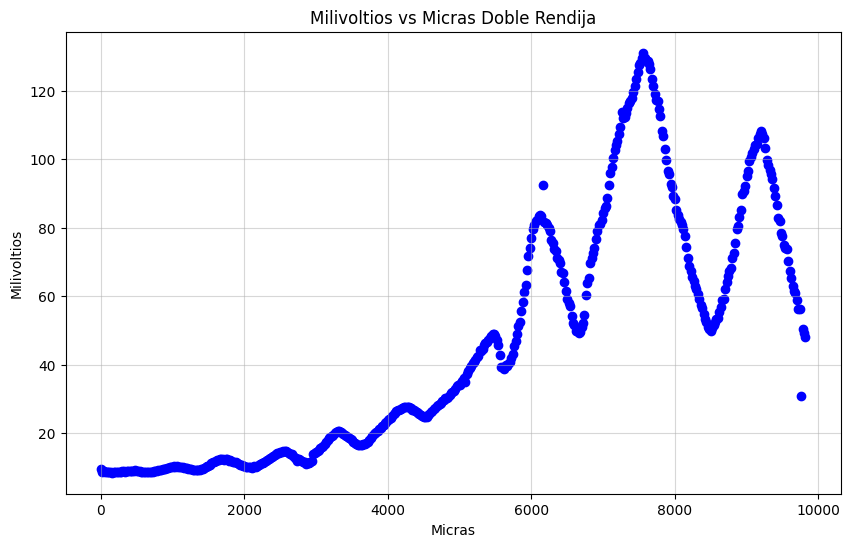

In [31]:
#Graficar Datos Doble Rendija
plt.figure(figsize=(10, 6))
plt.scatter(laser_doble["Micras"][0:492], laser_doble["Milivoltios"][0:492], color='blue', label='Doble Rendija')
plt.title('Milivoltios vs Micras Doble Rendija')
plt.xlabel('Micras')
plt.ylabel('Milivoltios')
plt.grid(alpha=0.5)
plt.show()

In [32]:
X_data = laser_doble["Micras"][0:492].to_numpy() * 1e-6
Y_data = laser_doble["Milivoltios"][0:492].to_numpy() * 1e-3

x_pico_max = X_data[np.argmax(Y_data)]
V_max = Y_data.max()
a = 0.1 * 1e-3
lambda_guess = 620 * 1e-9
d_guess = 0.5 * 1e-3
#C_guess = (a * np.pi) / lambda_guess
#D_guess = (2 * a * np.pi) / (lambda_guess * C_guess)
L = 1

def fraunhofer(x, A, d, lamb):
    theta = (x - x_pico_max) / L
    beta = (np.pi * a * np.sin(theta)) / lamb
    delta = (np.pi * d * np.sin(theta)) / lamb
    sinc = np.where(beta == 0, 1.0, np.sin(beta) / beta)
    return A * (np.cos(delta)**2) * (sinc**2)

initial_guess = [V_max, d_guess, lambda_guess]  # A, d, lambda
popt, pcov = curve_fit(fraunhofer, X_data, Y_data, p0=initial_guess)

C:\Users\PEPE\AppData\Local\Temp\ipykernel_320\4038673314.py:17: RuntimeWarning: invalid value encountered in divide
  sinc = np.where(beta == 0, 1.0, np.sin(beta) / beta)


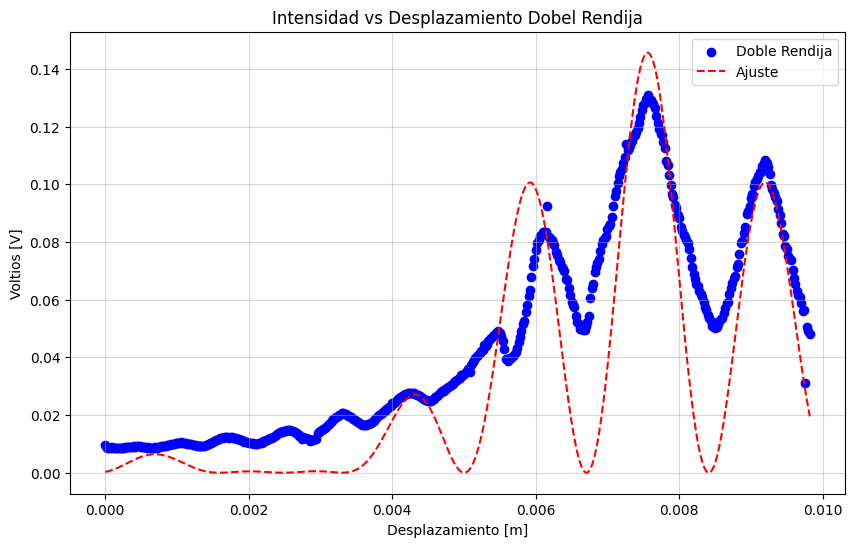

In [33]:
x_model = np.linspace(X_data.min(), X_data.max(), 1000)
y_model = fraunhofer(x_model, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(X_data, Y_data, color='blue', label='Doble Rendija')
plt.plot(x_model, y_model, color='red', label='Ajuste', linestyle='--')
plt.title('Intensidad vs Desplazamiento Dobel Rendija')
plt.xlabel('Desplazamiento [m]')
plt.ylabel('Voltios [V]')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [34]:
perr = np.sqrt(np.diag(pcov))
for name, value, error in zip(['A', 'd', 'lambda'], popt, perr):
    print(f"{name} = {value:.3e} ± {error:.3e}")

A = 1.456e-01 ± 3.655e-03
d = 2.981e-04 ± 1.010e-05
lambda = 5.081e-07 ± 1.647e-08


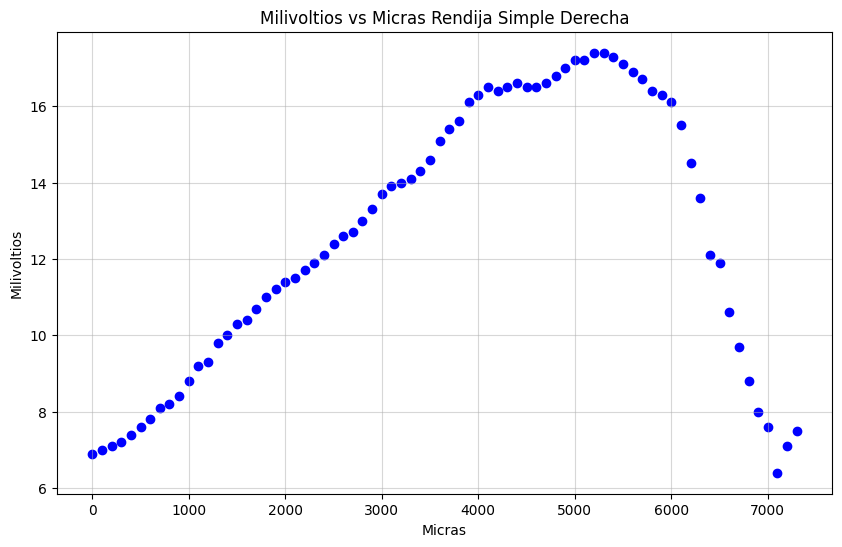

In [35]:
#Graficar Datos Rendjia Simple Derecha
plt.figure(figsize=(10, 6))
plt.scatter(laser_derecha["Micras"], laser_derecha["Milivoltios"], color='blue', label='Doble Rendija')
plt.title('Milivoltios vs Micras Rendija Simple Derecha')
plt.xlabel('Micras')
plt.ylabel('Milivoltios')
plt.grid(alpha=0.5)
plt.show()

In [36]:
X_data = laser_derecha["Micras"].to_numpy() * 1e-6
Y_data = laser_derecha["Milivoltios"].to_numpy() * 1e-3

x_pico_max = X_data[np.argmax(Y_data)]
V_max = Y_data.max()
a = 0.1 * 1e-3
lambda_guess = 620 * 1e-9
#C_guess = (a * np.pi) / lambda_guess
#D_guess = (2 * a * np.pi) / (lambda_guess * C_guess)
L = 1

def fraunhofer(x, A, lamb):
    theta = (x - x_pico_max) / L
    C = (a * np.pi) / lamb
    return (
        A *
        np.cos(theta * (2 * np.pi * a / (lamb * C)))**2 *
        (np.sin(theta * C) / np.where(theta * C == 0, 1e-10, theta * C))**2
    )

initial_guess = [V_max, lambda_guess]
popt, pcov = curve_fit(fraunhofer, X_data, Y_data, p0=initial_guess)
popt

array([1.52801991e-02, 1.02871896e-06])

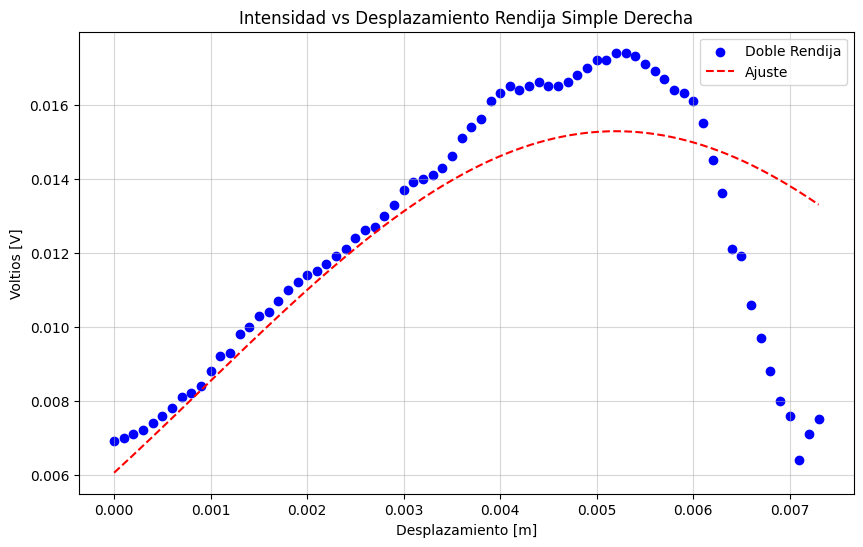

In [37]:
x_model = np.linspace(X_data.min(), X_data.max(), 1000)
y_model = fraunhofer(x_model, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(X_data, Y_data, color='blue', label='Doble Rendija')
plt.plot(x_model, y_model, color='red', label='Ajuste', linestyle='--')
plt.title('Intensidad vs Desplazamiento Rendija Simple Derecha')
plt.xlabel('Desplazamiento [m]')
plt.ylabel('Voltios [V]')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [38]:
perr = np.sqrt(np.diag(pcov))
for name, value, error in zip(['A', 'lambda'], popt, perr):
    print(f"{name} = {value:.3e} ± {error:.3e}")

A = 1.528e-02 ± 5.120e-04
lambda = 1.029e-06 ± 7.176e-08


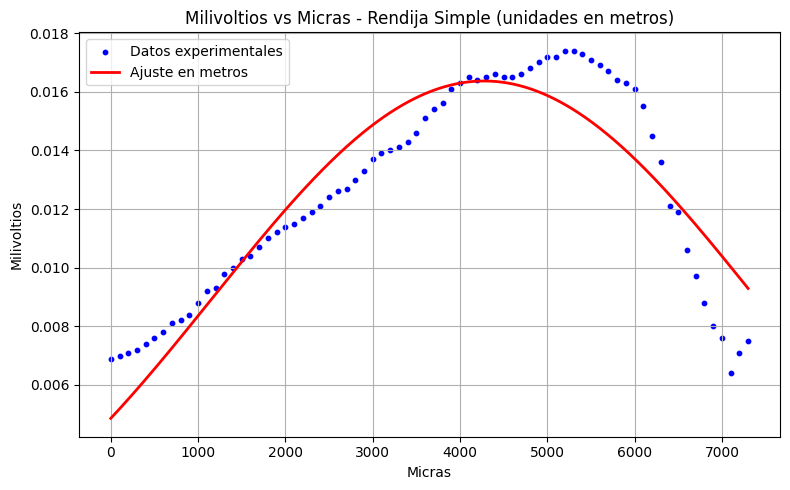

{'A (mV)': np.float64(0.016367250242243774),
 'C (fase)': np.float64(0.38679630475472193),
 'λ (metros)': np.float64(7.502147387155294e-07),
 'λ (nm)': np.float64(750.2147387155294)}

In [39]:

a_m = 0.1e-3  # 0.1 mm in meters
x0_m = X_data[np.argmax(Y_data)]

# Redefine the model using meters
def single_slit_meters(x, A, C, lamb):
    x_prime = x - x0_m
    B = np.pi * a_m / lamb
    argument = B * x_prime + C
    argument_safe = np.where(argument == 0, 1e-10, argument)
    return A * (np.sin(argument_safe) / argument_safe)**2

# Refit using curve_fit with bounds for lambda [1 nm, 2000 nm] = [1e-9, 2e-6] meters
bounds_lower_m = [0, -10, 1e-9]
bounds_upper_m = [100, 10, 2e-6]
initial_guess_m = [np.max(Y_data), 0, 670e-9]

# Fit the model
popt_meters, pcov_meters = curve_fit(
    single_slit_meters,
    X_data,
    Y_data,
    p0=initial_guess_m,
    bounds=(bounds_lower_m, bounds_upper_m)
)

# Generate model curve
x_model_m = np.linspace(np.min(X_data), np.max(X_data), 1000)
y_model_m = single_slit_meters(x_model_m, *popt_meters)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_data * 1e6, Y_data, color='blue', s=10, label='Datos experimentales')  # x back to microns
plt.plot(x_model_m * 1e6, y_model_m, color='red', linewidth=2, label='Ajuste en metros')
plt.title('Milivoltios vs Micras - Rendija Simple (unidades en metros)')
plt.xlabel('Micras')
plt.ylabel('Milivoltios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show fitted parameters
popt_meters_dict = {
    "A (mV)": popt_meters[0],
    "C (fase)": popt_meters[1],
    "λ (metros)": popt_meters[2],
    "λ (nm)": popt_meters[2] * 1e9
}
popt_meters_dict


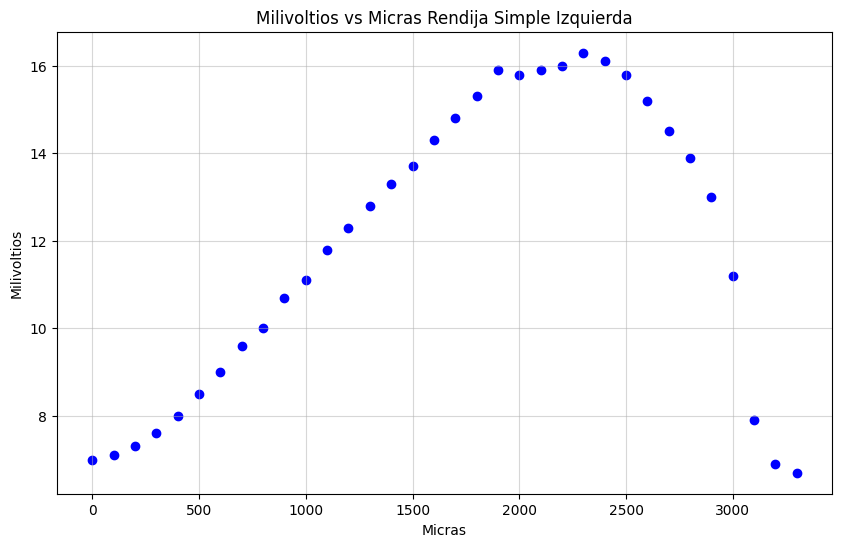

In [40]:
#Graficar Datos Rendjia Simple Izquierda
plt.figure(figsize=(10, 6))
plt.scatter(laser_izquierda["Micras"], laser_izquierda["MiliV"], color='blue', label='Doble Rendija')
plt.title('Milivoltios vs Micras Rendija Simple Izquierda')
plt.xlabel('Micras')
plt.ylabel('Milivoltios')
plt.grid(alpha=0.5)
plt.show()

In [41]:
X_data = laser_izquierda["Micras"].to_numpy() * 1e-6
Y_data = laser_izquierda["MiliV"].to_numpy() * 1e-3

x_pico_max = X_data[np.argmax(Y_data)]
V_max = Y_data.max()
a = 0.1 * 1e-3
lambda_guess = 620 * 1e-9
#C_guess = (a * np.pi) / lambda_guess
#D_guess = (2 * a * np.pi) / (lambda_guess * C_guess)
L = 1

def fraunhofer(x, A, lamb):
    theta = (x - x_pico_max) / L
    C = (a * np.pi) / lamb
    return (
        A *
        np.cos(theta * (2 * np.pi * a / (lamb * C)))**2 *
        (np.sin(theta * C) / np.where(theta * C == 0, 1e-10, theta * C))**2
    )

initial_guess = [V_max, lambda_guess]
popt, pcov = curve_fit(fraunhofer, X_data, Y_data, p0=initial_guess)
popt

array([1.45399287e-02, 4.50855077e-07])

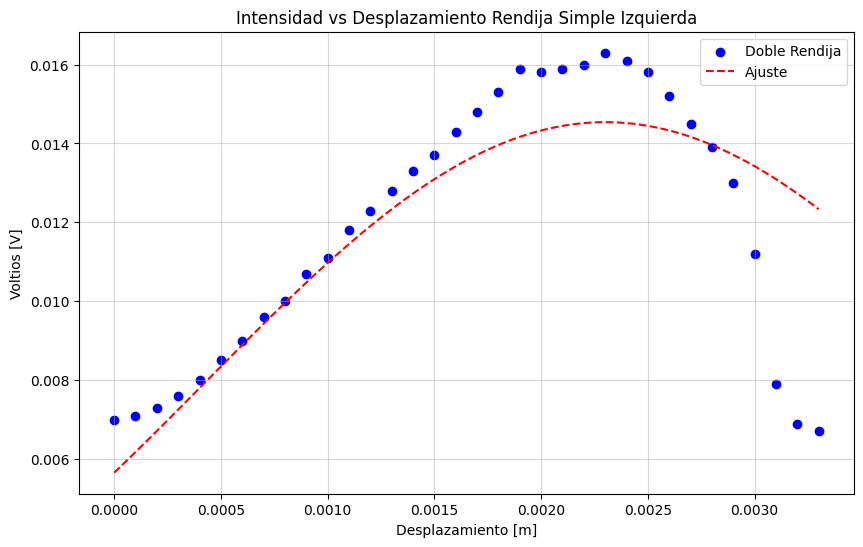

In [42]:
x_model = np.linspace(X_data.min(), X_data.max(), 1000)
y_model = fraunhofer(x_model, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(X_data, Y_data, color='blue', label='Doble Rendija')
plt.plot(x_model, y_model, color='red', label='Ajuste', linestyle='--')
plt.title('Intensidad vs Desplazamiento Rendija Simple Izquierda')
plt.xlabel('Desplazamiento [m]')
plt.ylabel('Voltios [V]')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [43]:
perr = np.sqrt(np.diag(pcov))
for name, value, error in zip(['A', 'lambda'], popt, perr):
    print(f"{name} = {value:.3e} ± {error:.3e}")

A = 1.454e-02 ± 8.987e-04
lambda = 4.509e-07 ± 5.618e-08


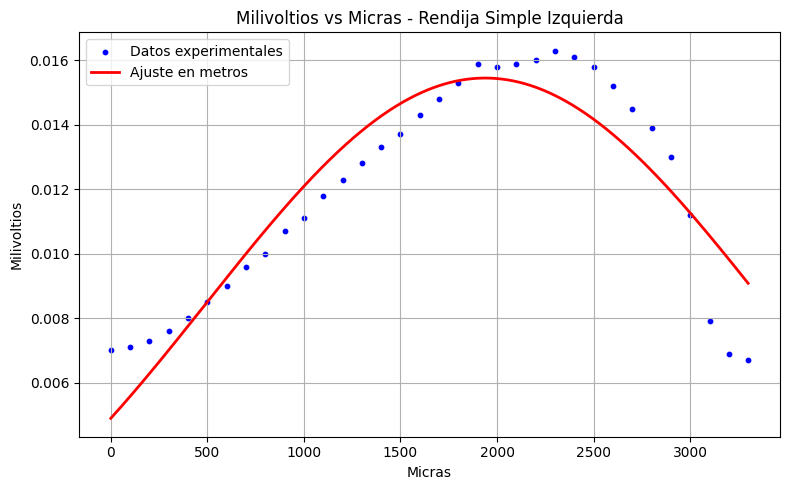

{'A (mV)': (np.float64(0.015451488204513732),
  np.float64(0.00031685770863698533)),
 'C (fase)': (np.float64(2.9435657232644754), np.float64(0.12990346180055373)),
 'λ (m)': (np.float64(3.4810100244375e-07),
  np.float64(1.3851733461908167e-08)),
 'λ (nm)': (np.float64(348.10100244375), np.float64(13.851733461908168))}

In [44]:
# Redefine the initial guess and bounds since the previous cell context was lost
initial_guess_left = [np.max(Y_data), 0, 670e-9]
bounds_lower = [0, -10, 1e-9]
bounds_upper = [100, 10, 2e-6]

# Fit the model again
popt_left, pcov_left = curve_fit(
    single_slit_meters,
    X_data,
    Y_data,
    p0=initial_guess_left,
    bounds=(bounds_lower, bounds_upper)
)

# Generate model
x_model_left = np.linspace(np.min(X_data), np.max(X_data), 1000)
y_model_left = single_slit_meters(x_model_left, *popt_left)

# Uncertainties
perr_left = np.sqrt(np.diag(pcov_left))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_data * 1e6, Y_data, color='blue', s=10, label='Datos experimentales')
plt.plot(x_model_left * 1e6, y_model_left, color='red', linewidth=2, label='Ajuste en metros')
plt.title('Milivoltios vs Micras - Rendija Simple Izquierda')
plt.xlabel('Micras')
plt.ylabel('Milivoltios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return fitted values and uncertainties
fitted_results_left = {
    "A (mV)": (popt_left[0], perr_left[0]),
    "C (fase)": (popt_left[1], perr_left[1]),
    "λ (m)": (popt_left[2], perr_left[2]),
    "λ (nm)": (popt_left[2] * 1e9, perr_left[2] * 1e9)
}
fitted_results_left
